# Lab Session 7: Testing and MyST Intro

> Friday 10-24-2025, 9AM-11AM & 1PM-3PM & 3PM-5PM
>
> Instructors: Instructors: [Jimmy Butler](https://statistics.berkeley.edu/people/james-butler) & [Sequoia Andrade](https://statistics.berkeley.edu/people/sequoia-rose-andrade)

What's on tap for today:
1. **Testing and Continuous Integration.** We will revisit the `Eratosthenes` project from Lab 4, improving upon it by writing tests and seeing how we can automate the testing workflow.
2. **MyST/Jupyter Book 2 Intro.** We'll introduce the mechanics of how to build a website using *MyST/Jupyter Book 2* to document and share your computational projects. This intro will be fairly limited in scope today; our primary goal is to give you the technical know-how to get started on the next homework assignment, and we will go into much greater depth next lab session.

## Testing

During Lab04 we turned the `Erasthostenes.ipynb` (located in this same folder `lab04` in the `site` repository, also in the `lab04` folder in the `shared` directory) into a project with its own installable modules. We didn't quite get to making the proper `conda` environment and hosting on Binder; however, you all got extensive practice with this in HW 1, so we will be providing a GitHub repository with the final product from the Lab 4 exercises. If you completed the exercises on your own and would like to use that repo, you are of course welcome to do so! In this follow up lab, we are going to be adding some tests to the code.

You can find the solutions repository [here](https://github.com/UCB-stat-159-f25/eratosthenes).

To get started, first create a fork of the Eratosthenes repository, and clone that fork to the Datahub. We will be designing tests on this fork. Please choose the owner of the fork as your own personal GitHub account; if you are concerned that this will clutter up your personal GitHub account, you may choose the course organization as the owner, but please change the name of the repo to `<your GH username>-eratosthenes` so we can distinguish with the original copy.

## 1. Simple Testing

Design some unit, integration, and regression tests for your Eratosthenes project. As we discussed in class, the first ones are easier to make, but still there are some things you need to think about:
1. How do you test code involving floating point numbers?
2. How do you test code that produces figures?
3. How do you test code that runs simulations or computes performance benchmarkings?

## 2. Using PyTest

The *Workflow and Automation* lecture from Spring 2023 provides some examples of how to run the tests from previous section automatically all at once by using `pytest`. Follow these steps in order to reproduce the results of your tests but now using `pytest`. You can find the lecture [here](https://ucb-stat-159-s23.github.io/site/lectures/testing/workflow.html)

## 3. Continuous Integration for testing

The last section in the _Workflow and Automation_ section in the lecture has a tutorial about how to automatically test your code everytime you push a new commit to GitHub. This is the first example of Continuous Integration (CI) you will explore in this course. Follow these steps in order to automate your new tests!

## MyST/Jupyter Book 2 Intro

As mentioned in lecture this past Wednesday, MyST and Jupyter Book 2 are exciting new tools that can be used to turn a collection of Jupyter Notebooks and Markdown files into a nice book-style website. They can smartly integrate computational output from notebooks, handle references and cross-linking of figures, equations, citations, etc. with ease, and also looks very pretty, all with minimal effort!

See the [lecture slides](https://docs.google.com/presentation/d/1YgxYuC12J_45ZzTob1FV3wwDNRhlQH-zhRlLh12VjF8/edit?usp=sharing) for some more high-level details about MyST.

Today, we are going to practice the workflow for deploying sites using MyST. We will be barely scratching the surface of what MyST can do; we will mainly be focused on the mechanics of getting set up, and hopefully you will get your footing by the end of this mini-tutorial.

### Using the Eratosthenes Repo
We will be making a MyST site using the Eratosthenes repo. Navigate to it to get started!

### Initialize a MyST Project
MyST has a simple command-line interface, or CLI, that makes it very easy to deploy and build beautiful projects and websites. To start a new MyST project, navigate to the home folder of your repository, and type `myst init` in the command line. *You will be prompted if you would like to run myst start. Let's say no for now.*

:::{note}
`myst start` is useful to run if you'd like to view a locally hosted version of your site, but it only works if you are using MyST on your local computer. Since we are operating from the Datahub, we'll have to do something else (covered below).
:::

### What's `myst.yml`?
You'll notice a file was automatically created called `myst.yml`. This essentially a configuration file which will house generic settings for your site, including themes, titles, authors, table of contents, etc. Take a look at it now; it seems pretty bare-bones, but we will add some things in a second!

Previewing a local copy of the website
Let's look at our site so far to see what we're working with. To view your site, let's do the following:
 - Run `myst build --html` in your terminal (make sure you are still in the main directory of your repo). This command instructs MyST to take the content of our repo and convert it to `html` for web viewing.
 - Open up a new Terminal. Navigate to the home folder of your repo, and run `python -m http.server -d _build/html/ 8000`. This opens up a server from the Datahub for us to view our website.
 - To preview your site, go to: https://stat159.datahub.berkeley.edu/user-redirect/proxy/8000/index.html
 - You should see something that looks like the following (names might be different depending on what you named your repo).

### 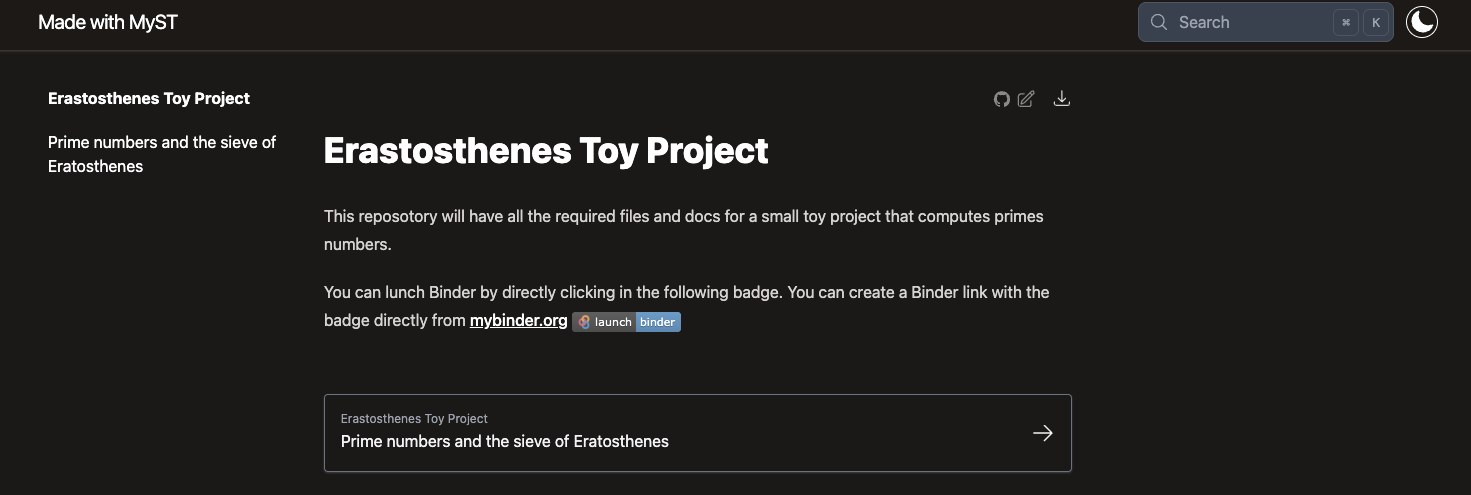

Now, you have a very basic copy of a website!

### Taking all the content in

Let's take a second to look at what just happened. The main landing page of the website the `README.md` file, rendered in a similar way as in GitHub. On the lefthand side, we see a table of contents, and the tab is actually the `Eratosthenes.ipynb` notebook we were working with earlier! All other files in the repo appear to be ignored. So, MyST treats `.md` files and `.ipynb` files as renderable content. The headings of our notebook and README became the headings for the tabs on the lefthand side.

Try clicking over to the tab with our notebook.

:::{important}
If you click on another tab, you'll likely get a 404 error. This is a quirk with our workaround for local builds of websites from the Datahub. In other words, if you built the website on your local machine using `myst start`, you wouldn't have to do this. To render that page, add `.html` to the end of the url and refresh.
:::

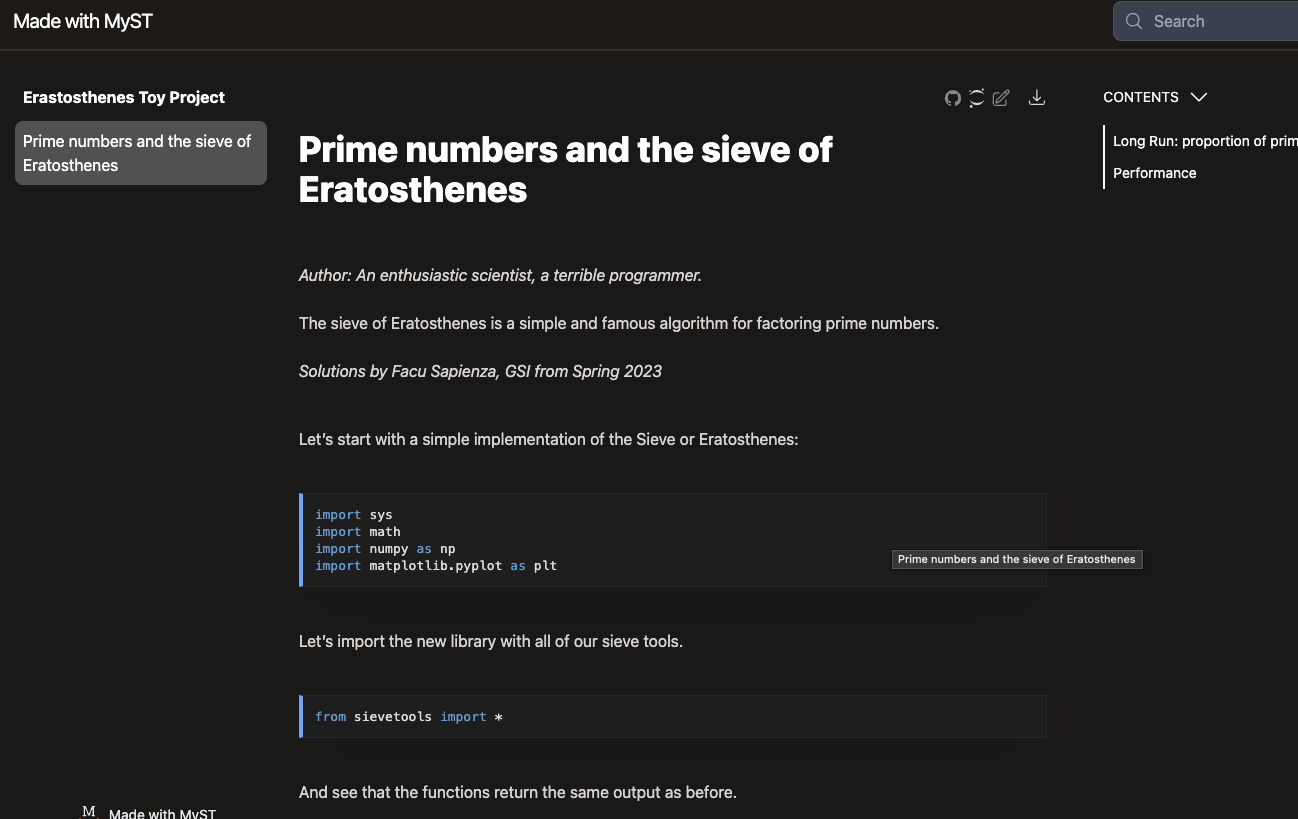

You should see a very nice view of our Jupyter Notebook, with code cells and plots rendered nicely. MyST does a great job of combining output from computational documents like notebooks and text into nice documents!

### Editing Content via `myst.yml`

Let's make some simple edits to the `myst.yml` file, like adding ourselves as an author, changing the title, and writing a table of contents. Do the first two steps first, save the file, and then perform the last by running `myst init --write-toc` in the terminal. Upon running this command, you should see the table of contents has been automatically added, only including the `.md` and `.ipynb` files in the repo. This last commmand automatically writes the table of contents. Remember to `myst build --html` again.

:::{note}
If you were to add another notebook file and run this command again, that notebook would be added to the table of contents! If you'd like to suppress a file in the table of contents, you can comment out that line in the `myst.yml`, and the tab will disappear.
:::

There's so much more you can control with this file, including adding a thumbnail for your website, banners, etc. Check out the [MyST Frontmatter documentation](https://mystmd.org/guide/frontmatter) if you'd like to play around some more with the `myst.yml` options.

### Deploying to GitHub Pages

We've been making local builds of our site, but let's get going to the world wide web! MyST makes it extremely simple to do.

1. Run `myst init --gh-pages`. This will tell MyST that we want to deploy our website to GitHub pages, a service that GitHub runs that allows you to host a website built from a GitHub repo.
2. Say yes to the next two prompts. You will see the second one asks about a `depoy.yml` file. This is a GitHub Action like we saw before, except this one instructs GitHub to redeploy our site every time we push. Follow the remaining instructions that MyST so nicely printed out in the terminal, and then visit your website at the link they provided.

### Extra Resources

Hopefully this is enough to get you started with using MyST! We will get much more practice next week in lab, but if you'd like to check out some more documentation on how to take full advantage of MyST and their markdown language, check out the following resource: https://mystmd.org/guide/